<a href="https://colab.research.google.com/github/shardul37taware/learning-cv/blob/main/MobileViTTrainer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torchvision.transforms as transforms
from PIL import Image, ImageFilter, ImageEnhance, ImageOps
import random

In [ ]:
!scp '/content/drive/My Drive/dataset.zip' '/content/dataset.zip'

!unzip '/content/dataset.zip' -d '/content/dataset'

Archive:  /content/dataset.zip
   creating: /content/dataset/dataset/
   creating: /content/dataset/dataset/result/
   creating: /content/dataset/dataset/result/test/
   creating: /content/dataset/dataset/result/test/damage/
  inflating: /content/dataset/dataset/result/test/damage/damage (100).png  
  inflating: /content/dataset/dataset/result/test/damage/damage (116).png  
  inflating: /content/dataset/dataset/result/test/damage/damage (118).png  
  inflating: /content/dataset/dataset/result/test/damage/damage (12).jpg  
  inflating: /content/dataset/dataset/result/test/damage/damage (120).png  
  inflating: /content/dataset/dataset/result/test/damage/damage (13).png  
  inflating: /content/dataset/dataset/result/test/damage/damage (131).png  
  inflating: /content/dataset/dataset/result/test/damage/damage (14).png  
  inflating: /content/dataset/dataset/result/test/damage/damage (149).png  
  inflating: /content/dataset/dataset/result/test/damage/damage (150).png  
  inflating: /cont

In [ ]:
def custom_preprocessing(img):
    # Histogram equalization (works best on grayscale)
    img = img.convert("L")  # Convert to grayscale
    img = ImageOps.equalize(img)

    # Convert back to RGB if your model expects 3 channels
    img = img.convert("RGB")

    # Contrast enhancement
    enhancer = ImageEnhance.Contrast(img)
    img = enhancer.enhance(1.5)  # 1.0 = original

    # Gaussian blur for noise reduction (very light)
    img = img.filter(ImageFilter.GaussianBlur(radius=0.5))

    return img


In [ ]:
transform_with_preprocessing = transforms.Compose([
    transforms.Lambda(custom_preprocessing),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])


 this one is for withiut preprocessing 👇

In [ ]:
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

train_dataset = datasets.ImageFolder("/content/dataset/dataset/result/train", transform=transform)
val_dataset = datasets.ImageFolder("/content/dataset/dataset/result/val", transform=transform)

from torch.utils.data import DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)


ths one for preprossing 👇

In [ ]:
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

train_dataset = datasets.ImageFolder("/content/dataset/dataset/result/train", transform=transform_with_preprocessing)
val_dataset = datasets.ImageFolder("/content/dataset/dataset/result/val", transform=transform_with_preprocessing)

from torch.utils.data import DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)


In [ ]:
import timm
import torch.nn as nn

model = timm.create_model("mobilevit_s", pretrained=True, num_classes=len(train_dataset.classes))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/22.4M [00:00<?, ?B/s]

In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)


In [ ]:
from tqdm import tqdm

for epoch in range(20):  # increase epochs as needed
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1} Loss: {running_loss/len(train_loader)}")


100%|██████████| 92/92 [03:31<00:00,  2.30s/it]


Epoch 1 Loss: 1.018558504788772


100%|██████████| 92/92 [03:28<00:00,  2.26s/it]


Epoch 2 Loss: 0.4043734538490358


100%|██████████| 92/92 [03:24<00:00,  2.23s/it]


Epoch 3 Loss: 0.2518704429106868


100%|██████████| 92/92 [03:21<00:00,  2.19s/it]


Epoch 4 Loss: 0.15335254561479972


100%|██████████| 92/92 [03:19<00:00,  2.17s/it]


Epoch 5 Loss: 0.10760501016984167


100%|██████████| 92/92 [03:20<00:00,  2.18s/it]


Epoch 6 Loss: 0.10513993631036062


100%|██████████| 92/92 [03:20<00:00,  2.18s/it]


Epoch 7 Loss: 0.08095057756113617


100%|██████████| 92/92 [03:21<00:00,  2.19s/it]


Epoch 8 Loss: 0.04816294386577995


100%|██████████| 92/92 [03:18<00:00,  2.15s/it]


Epoch 9 Loss: 0.054158872770368245


100%|██████████| 92/92 [03:19<00:00,  2.16s/it]


Epoch 10 Loss: 0.046365764040155744


100%|██████████| 92/92 [03:21<00:00,  2.19s/it]


Epoch 11 Loss: 0.04016865208825987


100%|██████████| 92/92 [03:18<00:00,  2.16s/it]


Epoch 12 Loss: 0.028404128553001614


100%|██████████| 92/92 [03:19<00:00,  2.17s/it]


Epoch 13 Loss: 0.03311501996611933


100%|██████████| 92/92 [03:18<00:00,  2.15s/it]


Epoch 14 Loss: 0.036004467270053596


100%|██████████| 92/92 [03:17<00:00,  2.15s/it]


Epoch 15 Loss: 0.029083379136864096


100%|██████████| 92/92 [03:19<00:00,  2.17s/it]


Epoch 16 Loss: 0.021576490483509944


100%|██████████| 92/92 [03:18<00:00,  2.15s/it]


Epoch 17 Loss: 0.016942147353446395


100%|██████████| 92/92 [03:17<00:00,  2.15s/it]


Epoch 18 Loss: 0.017971773187088293


100%|██████████| 92/92 [03:17<00:00,  2.15s/it]


Epoch 19 Loss: 0.02859965904423481


100%|██████████| 92/92 [03:19<00:00,  2.17s/it]

Epoch 20 Loss: 0.021735766560912296


In [ ]:
model.eval()
correct, total = 0, 0

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Validation Accuracy: {100 * correct / total:.2f}%")


Validation Accuracy: 93.47%


In [ ]:
torch.save(model.state_dict(), "mobilevit_s_disasterIII.pth")


In [ ]:
from google.colab import files
files.download("mobilevit_s_disasterIII.pth")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!cp mobilevit_s_disasterIII.pth /content/drive/MyDrive/


In [ ]:
!pip install scikit-learn matplotlib seaborn


In [ ]:
import torch
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, f1_score, precision_score, recall_score
import numpy as np

model.eval()
all_labels = []
all_preds = []
all_probs = []

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        outputs = model(images)

        probs = torch.softmax(outputs, dim=1)
        preds = torch.argmax(probs, dim=1)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())


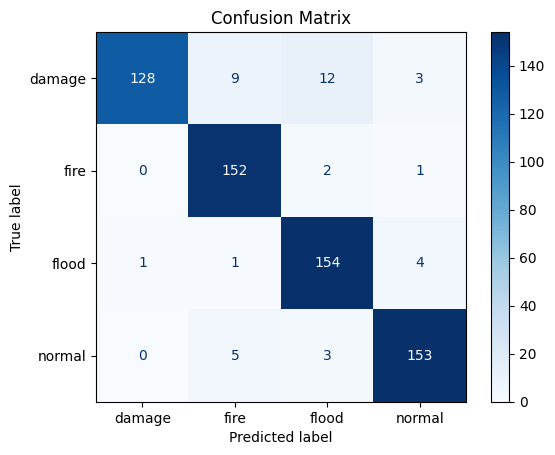

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(all_labels, all_preds)
class_names = val_dataset.classes

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
print(classification_report(all_labels, all_preds, target_names=class_names))


              precision    recall  f1-score   support

      damage       0.99      0.84      0.91       152
        fire       0.91      0.98      0.94       155
       flood       0.90      0.96      0.93       160
      normal       0.95      0.95      0.95       161

    accuracy                           0.93       628
   macro avg       0.94      0.93      0.93       628
weighted avg       0.94      0.93      0.93       628



In [ ]:
print("Macro F1 Score: ", f1_score(all_labels, all_preds, average='macro'))
print("Weighted F1 Score: ", f1_score(all_labels, all_preds, average='weighted'))
print("Macro Precision: ", precision_score(all_labels, all_preds, average='macro'))
print("Macro Recall: ", recall_score(all_labels, all_preds, average='macro'))


Macro F1 Score:  0.9339888903810282
Weighted F1 Score:  0.9342268268800896
Macro Precision:  0.9383307642654788
Macro Recall:  0.933890245863607
